In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv(r'D:\Machine Learning Practical\Position_Salaries.csv')

In [3]:
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [6]:
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

In [7]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred_linear = linear_regressor.predict(X)

In [8]:
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

In [9]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_pred_poly = poly_regressor.predict(X_poly)

In [10]:
r2_linear = linear_regressor.score(X, y)
r2_poly = poly_regressor.score(X_poly, y)

In [11]:
print(f"R-squared for Simple Linear Regression: {r2_linear}")
print(f"R-squared for Polynomial Regression: {r2_poly}")

R-squared for Simple Linear Regression: 0.6690412331929895
R-squared for Polynomial Regression: 0.9973922891706614


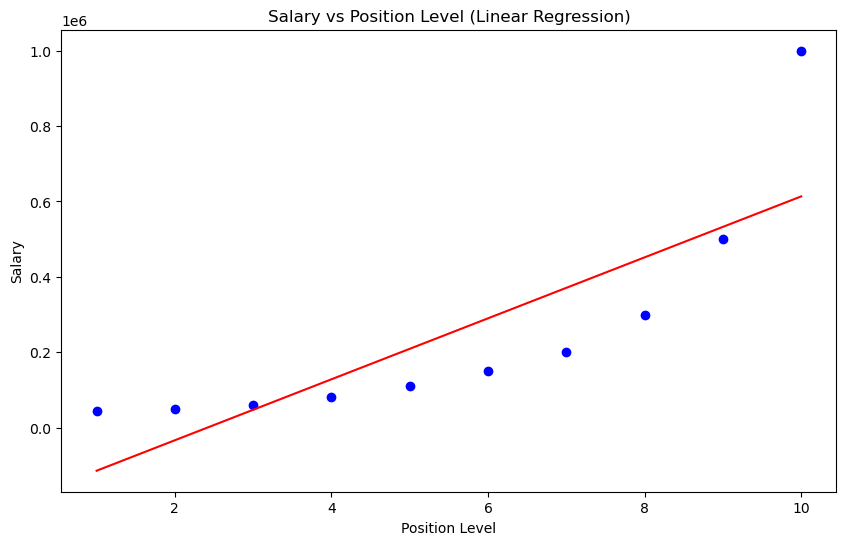

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_linear, color='red')
plt.title('Salary vs Position Level (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

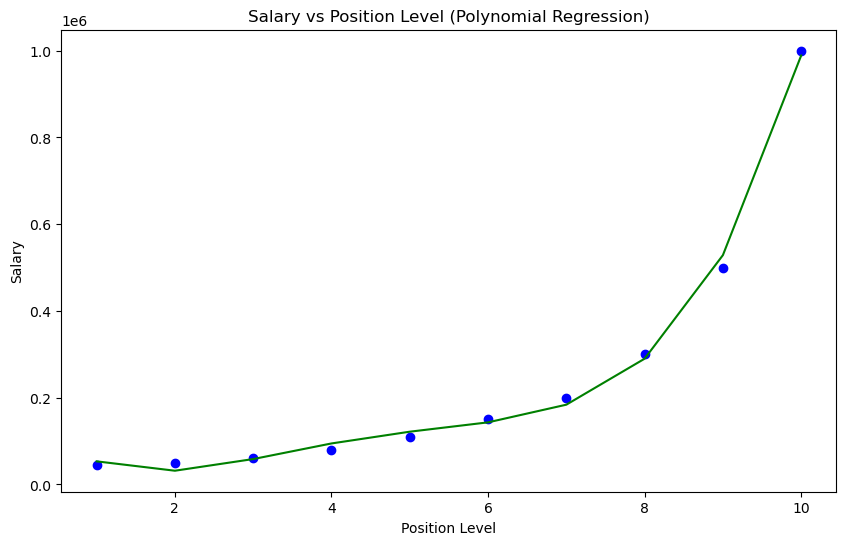

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_poly, color='green')
plt.title('Salary vs Position Level (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [14]:
# Predict salaries for level 11 and 12 using both models
level_11 = np.array([[11]])
level_12 = np.array([[12]])

In [15]:
# For Simple Linear Regression
salary_11_linear = linear_regressor.predict(level_11)
salary_12_linear = linear_regressor.predict(level_12)


In [16]:
# For Polynomial Regression
level_11_poly = poly_features.transform(level_11)
level_12_poly = poly_features.transform(level_12)

In [17]:
salary_11_poly = poly_regressor.predict(level_11_poly)
salary_12_poly = poly_regressor.predict(level_12_poly)

In [18]:
print(f"Predicted salary for Level 11 (Linear): {salary_11_linear[0]}")
print(f"Predicted salary for Level 12 (Linear): {salary_12_linear[0]}")
print(f"Predicted salary for Level 11 (Polynomial): {salary_11_poly[0]}")
print(f"Predicted salary for Level 12 (Polynomial): {salary_12_poly[0]}")

Predicted salary for Level 11 (Linear): 694333.3333333333
Predicted salary for Level 12 (Linear): 775212.1212121211
Predicted salary for Level 11 (Polynomial): 1780833.3333332192
Predicted salary for Level 12 (Polynomial): 3035984.8484848803
